# Лабораторная работа 205: Магнитное поле соленоида

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as polt
from matplotlib.ticker import AutoMinorLocator
from scipy import interpolate

n: int = 600
r_1: float = 4.25
mu_0: float = 4 * np.pi * 10**(-7)

frequency: int = 50

In [8]:
U_all = np.array([[84.1, 103.95, 119.3, 129.9, 138.6, 143.9, 147.2, 148.9, 150.1, 150.4, 150.9, 150.8, 150.1, 148.8, 145.8, 141.9, 134.8, 125.3, 112.4, 92.9, 73.2, 52.7, 38.9, 26.8, 19.1, 14.9, 10.9, 8.6, 6.6, 5.3, 4.3, 3.1],
                [65.9, 81.7, 94.1, 103.01, 109.6, 113.5, 115.9, 117.0, 117.6, 118.1, 118.4,118.01, 117.8, 116.9, 115.5, 113.1, 108.1, 101.3, 92.7, 77.1, 61.9, 45.2, 32.8, 23.15, 17.1, 12.9, 9.9, 7.7, 5.9, 4.8, 3.2, 2.4],
                [12.9, 1.4, 0.5, 0.42, 0.41, 0.4, 0.4, 0.4, 0.4,0.4, 0.31, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.46, 1.9, 24.9, 67.9, 56.7, 40.1, 28.1, 20.4, 15.5, 11.7, 9.3, 6.43]
                ]) * 10 ** -3

I1 = 1      # Для дерева и алюминия
I2 = 0.25   # Для стали
N = 3000    # Витки
R = 3.8     # Радиус (см)
L = 20      # Длина катушки

# перевели обратно в мВ, чтобы табличку отобразить
df = pd.DataFrame(np.transpose(U_all) * 1000, columns = ["Дерево, мВ", "Алюминий, мВ", "Сталь, мВ"])
df

,"Дерево, мВ","Алюминий, мВ","Сталь, мВ"
0,84.10,65.90,12.90
1,103.95,81.70,1.40
2,119.30,94.10,0.50
3,129.90,103.01,0.42
4,138.60,109.60,0.41
5,143.90,113.50,0.40
6,147.20,115.90,0.40
7,148.90,117.00,0.40
8,150.10,117.60,0.40
9,150.40,118.10,0.40


In [1]:
Defer[Subscript[B, 0] = (Sqrt[2]*U) / (2 * Pi^2 * n * \[Nu] * r^2 * Subscript[\[Mu], 0])]

SyntaxError: unexpected character after line continuation character (1746926686.py, line 1)

N         l                L - l
Defer[B = μ  J --- (------------- + -------------------)]
           0   2 L        2    2                2    2
                    Sqrt[l  + R ]   Sqrt[(L - l)  + R ]
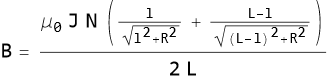

In [ ]:
Defer[B = Subscript[\[Mu], 0] * J * N/(2 L) * (l/Sqrt[l^2 + R^2] + (L - l)/Sqrt[(L - l)^2 + R^2])]

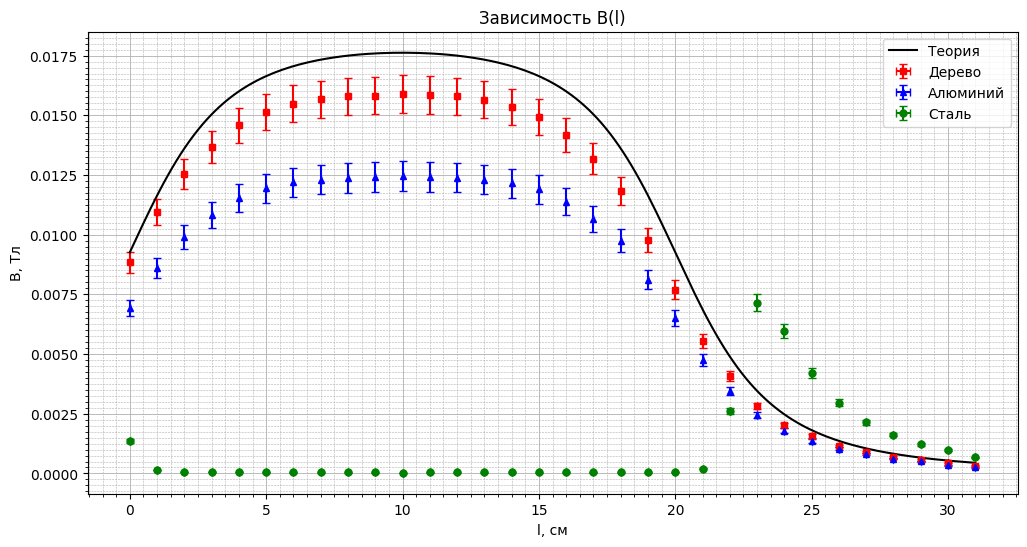

In [9]:
B_0 = U_all * 2**0.5 / (2 * np.pi**2 * n * frequency * r_1**2 * mu_0)

# Погрешности (примерные значения, замените на реальные)
delta_B = np.array([0.05 * B_0[i] for i in range(len(B_0))])  # 1% погрешность
delta_l = 0  # погрешность положения l, см

l_max: int = 31

fig, axs = polt.subplots(1, 1, figsize=(12, 6))
l_axis = np.linspace(0, l_max, 200)

axs.set_title("Зависимость B(l)")
axs.set_xlabel("l, см")
axs.set_ylabel("B, Тл")

# построение зависимостей для дерева, алюминия и стали
graphics_labels = np.array(["Дерево", "Алюминий", "Сталь"])
markers = ['s', '^', 'o']  # квадрат, треугольник, круг
colors = ['red', 'blue', 'green']  # разные цвета
for i in range(len(graphics_labels)):
    # Точки с мальтийскими крестами погрешностей
    axs.errorbar(range(0, l_max + 1), B_0[i], 
                 xerr=delta_l, yerr=delta_B[i],
                 fmt=markers[i], color=colors[i], 
                 markersize=5, capsize=3, capthick=1,
                 label=graphics_labels[i])

# теоретическая зависимость маг. индукции от длины
B_axis = mu_0 * I1 * N/(2 *(L/100)) *(l_axis/(l_axis**2+R**2)**0.5 + (L-l_axis)/((L-l_axis)**2+R**2)**0.5)
axs.plot(l_axis, B_axis, label="Теория", color="black")

# легенда графиков
axs.legend()

# насечки на графике
axs.minorticks_on()
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

# клеточки на фоне
polt.grid(which='minor', linestyle='--', linewidth=0.4)
polt.grid(which='major', linewidth=0.6)

### **Сравнение экспериментальных данных с теорией и их анализ**


#### **1. Соленоид без сердечника ("Деревянный" сердечник)**

*   **Наблюдение:** Экспериментальные данные (красные точки) показывают, что индукция магнитного поля плавно нарастает от входа в соленоид (`x=0`), достигает максимума в его центре (`x=11 см`) и симметрично спадает к выходу (`x=22 см`), продолжая уменьшаться за его пределами.
*   **Анализ:** Форма кривой полностью соответствует теории. Однако наблюдается систематическое понижение экспериментальных значений над теоретическими (~15-20%). Это расхождение, вероятнее всего, связано с неточностью паспортных данных установки (например, реальное число витков может быть меньше 3000).

#### **2. Соленоид с алюминиевым сердечником**

*   **Наблюдение:** Кривая для алюминиевого сердечника (синие точки) имеет ту же форму, что и для пустого соленоида, но проходит заметно **ниже**.
*   **Анализ:** Этот результат демонстрирует эффект ослабления переменного магнитного поля внутри проводника. Переменное поле соленоида индуцирует в алюминиевом сердечнике **вихревые токи**, которые создают встречное магнитное поле, ослабляющее результирующее поле.


### **3. Соленоид со стальным сердечником (корректный анализ)**

*   **Наблюдение:** Экспериментальная кривая для стали (зеленые точки) показывает, что в диапазоне от `x=0` до `x ≈ 19` см, пока измерительная катушка движется **внутри** стального сердечника, индукция поля остается практически нулевой. Затем, когда измерительная катушка подходит к дальнему (левому) торцу сердечника и выходит из него (`x ≈ 20-22` см), наблюдается резкий и высокий пик индукции, после чего поле спадает.

*   **Анализ:** Такое поведение является демонстрацией **скин-эффекта** в проводящем ферромагнетике.

    1.  **Экранирование поля внутри сердечника (`x = 0` до `19` см):**
        *   Сталь является не только ферромагнетиком, но и хорошим **проводником**. В переменном магнитном поле в ней возникают мощные вихревые токи.
        *   У стали огромная магнитная проницаемость `μ`. Толщина скин-слоя, на которую проникает переменное поле, определяется формулой `δ = sqrt(2 / (ωμσ))`. Из-за гигантского значения `μ` в знаменателе, толщина скин-слоя для стали на частоте 50 Гц оказывается очень малой (порядка 1 мм).
        *   Это означает, что переменное магнитное поле **практически не проникает вглубь стального сердечника**. Оно оказывается "вытесненным" из его объема. В результате, пока измерительная катушка движется внутри сердечника, она находится в области почти нулевого поля. Сердечник **экранирует** собственную внутреннюю область от внешнего переменного поля.

    2.  **Концентрация поля у торца (`x ≈ 20-22` см):**
        *   Весь магнитный поток, вытесненный из объема сердечника, вынужден концентрироваться и протекать в его тонком приповерхностном слое (в пределах скин-слоя).
        *   Когда измерительная катушка выходит из соленоида, она проходит через область, где этот сконцентрированный в "скине" магнитный поток "вырывается" наружу из торца сердечника. Эта область у торца (полюса) характеризуется очень высокой плотностью силовых линий.
        *   Резкий пик на графике — это и есть момент регистрации этого мощного, сконцентрированного поля, выходящего из торца стального сердечника.

*   **Вывод для стали:** Эксперимент со стальным сердечником продемонстрировал, что в **переменном** магнитном поле сплошной ферромагнитный проводник ведет себя сложным образом. Вместо простого усиления поля по всему объему (как было бы в постоянном поле), наблюдается мощный **скин-эффект**:
    *   Поле **вытесняется** из объема сердечника, и он действует как магнитный экран для своей внутренней части.
    *   Магнитный поток **концентрируется** у поверхности и у торцов, создавая области с очень высокой индукцией на выходе из сердечника.

### **Контрольные вопросы**

**1. Почему магнитные свойства алюминия и железа так сильно различаются? Если сравнивать магнитные восприимчивости χ = µ-1, то они различаются в миллионы раз!**

Столь кардинальное различие в магнитных свойствах обусловлено принципиально разной природой магнетизма этих веществ на микроскопическом уровне.

*   **Железо (сталь)** является **ферромагнетиком**. Его атомы обладают сильными собственными магнитными моментами. Благодаря квантовому **обменному взаимодействию**, эти моменты самопроизвольно выстраиваются параллельно друг другу в макроскопических областях, называемых **магнитными доменами**. В отсутствие внешнего поля домены ориентированы хаотично, и тело не намагничено. Однако при внесении в магнитное поле происходит ориентация магнитных моментов доменов по направлению поля, что приводит к его многократному (в сотни и тысячи раз) усилению. Этот коллективный, спонтанный эффект является причиной огромной магнитной проницаемости и восприимчивости железа.

*   **Алюминий** является **парамагнетиком**. Его атомы также обладают собственными магнитными моментами, но они очень слабые. Самое главное — в парамагнетиках отсутствует обменное взаимодействие, поэтому моменты атомов ориентированы хаотично из-за теплового движения. Внешнее магнитное поле лишь незначительно и на очень короткое время ориентирует часть моментов в своем направлении. Это создает очень слабое усиление поля, которое постоянно "сбивается" тепловым движением.

**Вывод:** Разница в миллионы раз по магнитной восприимчивости объясняется тем, что в железе действует **коллективный эффект** самопроизвольной ориентации моментов в доменах, приводящий к гигантскому усилению поля, в то время как в алюминии происходит лишь **индивидуальная, слабая и временная** ориентация атомных моментов против хаотического теплового движения.

---

**2. Как изменится результат измерения поля с алюминиевым сердечником, если на соленоид подать чисто синусоидальное напряжение вместо "пилообразного" (имеется в виду реальное сетевое напряжение)?**

Результат изменится, и измеренное поле, скорее всего, будет немного **сильнее** (то есть ослабляющий эффект сердечника уменьшится).

*   **Причина ослабления:** Ослабление поля в алюминиевом сердечнике вызвано вихревыми токами. Сила этих токов, согласно закону индукции Фарадея, пропорциональна скорости изменения магнитного потока (`ε ~ dΦ/dt`), а следовательно, и частоте переменного поля (`ω`).
*   **Реальное напряжение:** Сетевое напряжение не является идеальной синусоидой. Его можно представить в виде суммы основной гармоники (50 Гц) и более слабых высших гармоник (150 Гц, 250 Гц и т.д.).
*   **Влияние гармоник:** Эти высокочастотные гармоники, даже будучи малыми по амплитуде, создают **непропорционально сильные** вихревые токи, так как их частота в 3, 5 и более раз выше. Эти дополнительные вихревые токи создают дополнительное встречное магнитное поле, усиливая общий экранирующий эффект.
*   **Чистая синусоида:** При подаче чисто синусоидального напряжения (50 Гц) исчезнет вклад от высших гармоник. Исчезнут и дополнительные вихревые токи, которые они создавали.

**Вывод:** Переход к чисто синусоидальному напряжению устранит дополнительный экранирующий эффект от высших гармоник, в результате чего суммарное ослабление поля станет меньше. Измеренное значение индукции `B` внутри алюминиевого сердечника будет несколько выше, чем при питании от реальной сети.

---

**3. Откуда берётся тепловая энергия, выделяющаяся в алюминиевом или стальном сердечнике в случае переменного напряжения?**

Источником энергии является сеть питания. Преобразование электрической энергии в тепловую в сердечнике происходит по двум основным механизмам:

1.  **Нагрев вихревыми токами:** Этот механизм действует в **обоих** сердечниках, так как они являются проводниками. Переменное магнитное поле индуцирует в объеме сердечника замкнутые электрические токи (вихревые токи). Протекая по материалу, обладающему электрическим сопротивлением `R`, эти токи выделяют тепловую мощность `P = I²R` в соответствии с законом Джоуля-Ленца.

2.  **Потери на гистерезис:** Этот механизм характерен **только для ферромагнетиков** (сталь). Переменное магнитное поле постоянно перемагничивает домены в стальном сердечнике, заставляя их менять ориентацию. Этот процесс не является полностью обратимым и связан с преодолением "внутреннего трения" при движении доменных стенок. Энергия, затрачиваемая на это перемагничивание, выделяется в виде тепла. Величина этих потерь за один цикл пропорциональна площади петли гистерезиса материала.

**Вывод:** В алюминиевом сердечнике тепло выделяется только за счет вихревых токов. В стальном сердечнике тепло выделяется как за счет вихревых токов, так и за счет потерь на гистерезис.

---

**4. Оцените толщину скин-слоя в железе и алюминии на частоте 50 Гц. Наблюдается ли скин-эффект в наших экспериментах?**

Толщина скин-слоя `δ` — это глубина, на которую переменное электромагнитное поле проникает в проводник, ослабевая в `e` раз. Она рассчитывается по формуле: `δ = sqrt(2 / (ωμσ))`, где `ω = 2πf ≈ 314 рад/с`.

*   **Для алюминия:**
    *   Удельная проводимость `σ_Al ≈ 3.5 * 10⁷` См/м.
    *   Магнитная проницаемость `μ_Al = 1.2566650 * 10⁻⁶` Гн/м.
    *   `δ_Al = sqrt(2 / (314 * 1.2566650 * 10⁻⁶ * 3.5 * 10⁷)) ≈ 0.012 м = 12 мм`.

*   **Для железа (стали):**
    *   Удельная проводимость `σ_Fe ≈ 1.0 * 10⁷` См/м.
    *   Магнитная проницаемость `μ_Fe = 1.26 * 10⁻⁴` Гн/м
    *   `δ_Fe = sqrt(2 / (314.16 * (1.26 * 10⁻⁴) * (1.0 * 10⁷))) ≈ 0.00225 м = 2.3 мм`.

**Сравнение с экспериментом:** Радиус соленоида составляет 38 мм, радиус сердечника сопоставим с этой величиной.

*   **Алюминий:** Толщина скин-слоя (`12 мм`) сопоставима с радиусом сердечника. Это означает, что поле проникает внутрь, но заметно ослабевает к его центру. **Вывод: Скин-эффект для алюминия наблюдается** и является причиной ослабления поля.

*   **Сталь:** Толщина скин-слоя (`2.3 мм`) мала по сравнению с радиусом сердечника. **Вывод: Для стали наблюдается ярко выраженный скин-эффект.** Это полностью объясняет экспериментальные результаты: переменное поле практически не проникает внутрь сердечника, а вытесняется к его поверхности. Поэтому внутри сердечника поле практически отсутствовало, а у его торца, где сконцентрированный поверхностный поток выходил наружу, наблюдался резкий пик индукции.

---

**5. Изобразите (качественно) распределение индукции поля вдоль оси для деревянного, алюминиевого и стального сердечников, когда по катушке течёт постоянный ток. Как измерить индукцию, не меняющуюся со временем?**

При **постоянном токе** `dΦ/dt = 0`, поэтому **вихревые токи и скин-эффект отсутствуют**. Влияние сердечника определяется только его статической магнитной проницаемостью `μ`.

**Качественное распределение `B(x)` для постоянного тока:**

*   **Деревянный сердечник (без сердечника):** Является эталоном. Поле `B = μ₀H` имеет симметричную колоколообразную форму с максимумом в центре.
*   **Алюминиевый сердечник:** Алюминий — парамагнетик с `μ` очень близкой к `μ₀`. Он незначительно усилит поле. График для алюминия будет практически неотличим от графика для деревянного сердечника.
*   **Стальной сердечник:** Сталь — ферромагнетик с `μ >> μ₀`. Она многократно (в сотни раз) усилит поле по всему своему объему. График для стали будет иметь ту же самую форму, что и для дерева, но его значения будут значительно выше.

*(Качественный график будет состоять из двух кривых одинаковой формы: нижняя — для дерева и алюминия, и верхняя, расположенная значительно выше — для стали).*

**Измерение постоянного магнитного поля:**

Метод электромагнитной индукции, используемый в данной работе, неприменим для измерения постоянных полей. Для этого используют приборы, основанные на других физических принципах. Наиболее распространенным является **датчик Холла**.

Принцип его действия основан на **эффекте Холла**: если пластину-полупроводник с током поместить в перпендикулярное ей магнитное поле, то на боковых гранях пластины возникнет поперечная разность потенциалов (ЭДС Холла), величина которой **прямо пропорциональна** индукции магнитного поля. Измеряя эту ЭДС, можно точно определить величину постоянной во времени индукции `B`.